In [1]:
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader, random_split
from torch.utils.tensorboard import SummaryWriter

/usr/local/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
train_transforms = transforms.Compose([
    # transforms.RandomResizedCrop(224),  # 随机裁剪并调整到指定大小
    transforms.Resize(224),
    # transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),  # 随机水平翻转，增加左右方向上的泛化
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),  # 随机调整亮度、对比度、饱和度和色调
    transforms.RandomRotation(20),  # 随机旋转±20度
    transforms.ToTensor(),  # 转换成Tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # 归一化处理
])
val_transforms = transforms.Compose([
    transforms.Resize(224),
    # transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

cifar100_training = CIFAR100(root='./data', train=True, download=True, transform=val_transforms)
cifar100_testing = CIFAR100(root='./data', train=False, download=True, transform=val_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


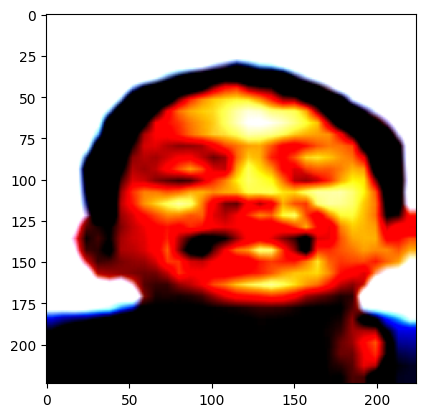

In [27]:
plt.imshow(cifar100_training[900][0].permute(1, 2, 0))